In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-04-01 23:58:41,461 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-01 23:58:41,462 - settings - Setting database.user to celiib
INFO - 2021-04-01 23:58:41,463 - settings - Setting database.password to newceliipass
INFO - 2021-04-01 23:58:41,477 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-01 23:58:41,478 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-01 23:58:41,490 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-01 23:58:41,935 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-01 23:58:41,938 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-01 23:58:41,939 - settings - Setting database.user to celiib
INFO - 2021-04-01 23:58:41,940 - settings - Setting database.password to newceliipass
INFO - 2021-04-01 23:58:41,941 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-01 23:58:41,942 - settings - Setting database.user to celiib
INFO - 2021-04-01 23:58:41,942 - settings - Setting database.password to newceliipass
INFO - 2021-04-01 23:58:41,943 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-01 23:58:42,406 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [4]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

Segment_id = 864691135564655959


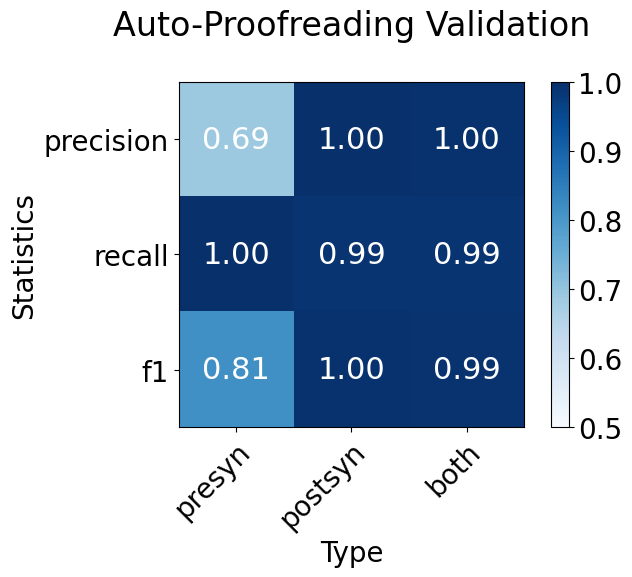

In [12]:
curr_idx = 30
segment_id = segment_ids[curr_idx]
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [13]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
)

Working on Neuron: 864691135564655959


Synapse Category Results, synapse_type = presyn
# of TP = 11
# of TN = 72
# of FP = 5
# of FN = 0
No axon skeleton attribute stored in database table


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [14]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691135564655959

In [15]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [16]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691135564655959

In [17]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([10]), 'L4': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])}
Limb L0 soma angle: 14.97 
Limb L1 soma angle: 148.54 
Limb L2 soma angle: 127.76 
Limb L3 soma angle: 105.66 
Limb L4 soma angle: 173.62 
Limb L5 soma angle: 70.57 
Limb L6 soma angle: 85.74 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5, 6]

Phase 2: Working on Limb L1
nodes_to_eliminate = [6]

Phase 2: Working on Limb L2
nodes_to_eliminate = [3]

Phase 2: Working on Limb L3
nodes_to_eliminate = [0 1]

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L5
nodes_to_eliminate = [2]

Phase 2: Working on Limb L6
nodes_to_eliminate = []

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----
No endpoints were eliminated so don't 

base_final_widths = [153.21894469 151.93259789]
overall_ais_width = 141.34716955741501
ais_width = 152.57577128757714
Adding the following branches as true axons: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
curr_soma_angle = 173.62
max_axon_angle = 171.90464438573505
Changing to a better axon candidate


 --- Working on limb 5, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 5, candidate # 1
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 6, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 
Using the best axon approach
Using True
Limb L4: Axon branches before dendritic path filter = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
Limb L4: Axon branches AFTER

({'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])},
 {'L0': array([10])})

In [18]:
nviz.plot_axon(neuron_obj,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Filtering Dendrite on Axon then recomputing High Fidelity Axon

In [19]:
plot_limb_branch_filter_with_disconnect_effect = False
verbose = False
verbose_outline = True

pre_filters = pru.get_exc_filters_high_fidelity_axon_preprocessing()
o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj,
                                        filter_list = pre_filters,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)


--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 0.3215677738189697 -----


In [20]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(o_neuron_pre)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [597698.1 613470.1 702083. ]
Time for preparing soma vertices and root: 0.0008862018585205078
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/23495 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.753972053527832
branches_touching_root = [12]
combining close nodes
combine_threshold = 1300
length of Graph = 7451
After combining close endpoints max(kept_branches_idx) = 70, len(kept_branches_idx) = 63
empty_indices % = 0.0
 conflict_indices % = 0.02232695014287542


  0%|          | 0/27 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/63 [00:00<?, ?it/s]

Decomposing first pass: 4.571765661239624
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.0005419254302978516
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.363059997558594e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03559398651123047
sbv[0].reshape(-1,3) = [[597698.1 613470.1 702083. ]]
closest_sk_pt_coord BEFORE = [597801.70542898 613820.78342672 701560.85435919]
current_skeleton.shape = (606, 2, 3)
node_for_stitch = 0: [597801.70542898 613820.78342672 701560.85435919]
node_for_stitch AFTER = 0: [597801.70542898 613820.78342672 701560.85435919]
possible_node_loc = [  0 600]
possible_node_loc AFTER = [  0 600]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma

  0%|          | 0/4 [00:00<?, ?it/s]

Removed 3 skeletal branches


  0%|          | 0/63 [00:00<?, ?it/s]

46945 46946
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/57 [00:00<?, ?it/s]

Limb Correspondence before stitching = 57
Limb Correspondence AFTER stitching = 57
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f9afd7339e8>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [597801.70542898 613820.78342672 701560.85435919]---------
Starting_edge inside branches_to_conept = [[597801.70542898 613820.78342672 701560.85435919]
 [618476.6236395  666789.10272201 708209.89744269]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [10]
printing out current edge:
[[597801.70542898 613820.78342672 701560.85435919]
 [618476.6236395  666789.10272201 708209.89744269]]
edge_endpoints_to_process was empty so exiting loop after 57 iterations
starting_node in concept map (that should match the starting edge) = 12
Total time for branches to concept conversion = 0.3717625141143799

Done generating concept network 

In [23]:
nviz.plot_axon(neuron_obj_high_fid_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Computing the Boutons of the Axon

In [21]:
import axon_utils as au
neuron_obj_with_boutons = au.calculate_boutons(#parameters for run
neuron_obj = neuron_obj_high_fid_axon,
plot_axon_branches_to_check = False,
plot_boutons = False,
verbose = False,
)


  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

# Computing the Webbing

In [22]:
neuron_obj_with_web = au.calculate_axon_webbing(neuron_obj_with_boutons,
                      idx_to_plot = [0],
                plot_intersection_mesh = True,
                plot_intersection_mesh_without_boutons = True,
                plot_split = True,
                plot_split_closest_mesh = True,
                plot_segmentation_before_web = True,
                plot_web = True,
                        plot_webbing_on_neuron = False,
                    verbose = False,
                        )

Upstream Node (red), Downstream Nodes (aqua)


Upstream Node (red), Downstream Nodes (aqua)


Mesh Split with significance_threshold = 20


  0%|          | 0/24 [00:00<?, ?it/s]

Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(88, 3), faces.shape=(171, 3))> (0.177494)
Mesh 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))> (0.329194)
Mesh 2: <trimesh.Trimesh(vertices.shape=(49, 3), faces.shape=(91, 3))> (0.73163)
Mesh 3: <trimesh.Trimesh(vertices.shape=(48, 3), faces.shape=(90, 3))> (0.19982)
Mesh 4: <trimesh.Trimesh(vertices.shape=(41, 3), faces.shape=(76, 3))> (0.3459465)
Mesh 5: <trimesh.Trimesh(vertices.shape=(39, 3), faces.shape=(72, 3))> (0.234)
Mesh 6: <trimesh.Trimesh(vertices.shape=(34, 3), faces.shape=(62, 3))> (0.1746815)
Mesh 7: <trimesh.Trimesh(vertices.shape=(34, 3), faces.shape=(60, 3))> (0.6695455)
Mesh 8: <trimesh.Trimesh(vertices.shape=(35, 3), faces.shape=(56, 3))> (0.511253)
Mesh 9: <trimesh.Trimesh(vertices.shape=(30, 3), faces.shape=(54, 3))> (0.3353745)
Mesh 10: <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(53, 3))> (0.361958)
Mesh 11: <trimesh.Trimesh(vertices.shape=(30, 3), faces.shape=(53, 3))> (0.21

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
nviz.plot_boutons(neuron_obj_with_web,
                  mesh_whole_neuron_alpha = 0.2,
                 plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
